In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [108]:
data = pd.read_csv("sleep_data_time.csv")
df = pd.DataFrame(data)
df.head()

,ID,Spo2,Label
0,0,92,Moderate
1,1,92,Moderate
2,2,92,Moderate
3,3,92,Moderate
4,4,92,Moderate


<AxesSubplot:xlabel='ID'>

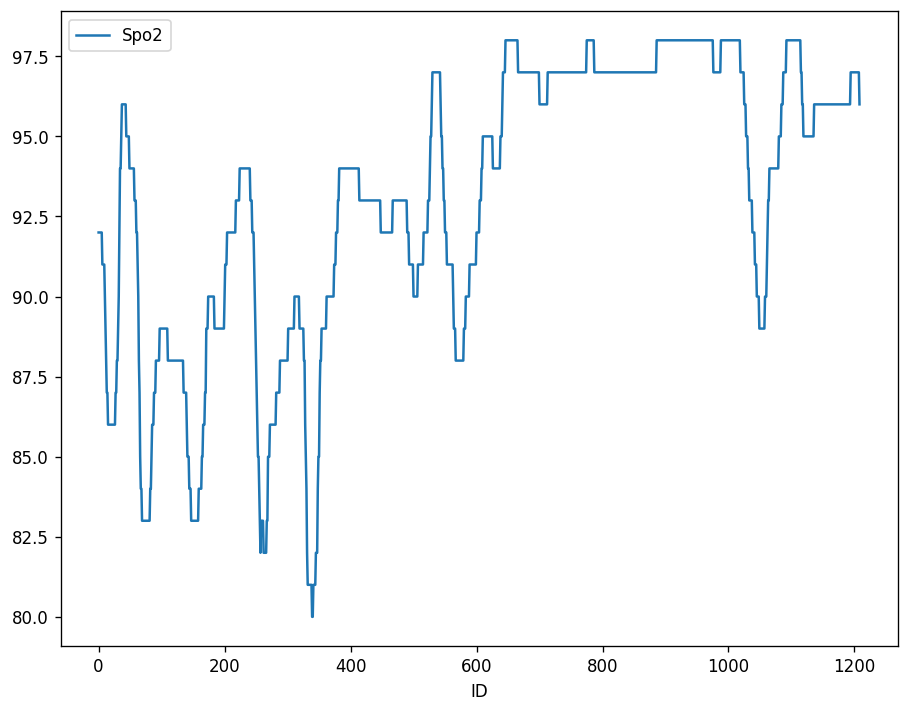

In [109]:
df.plot(x='ID', y='Spo2')

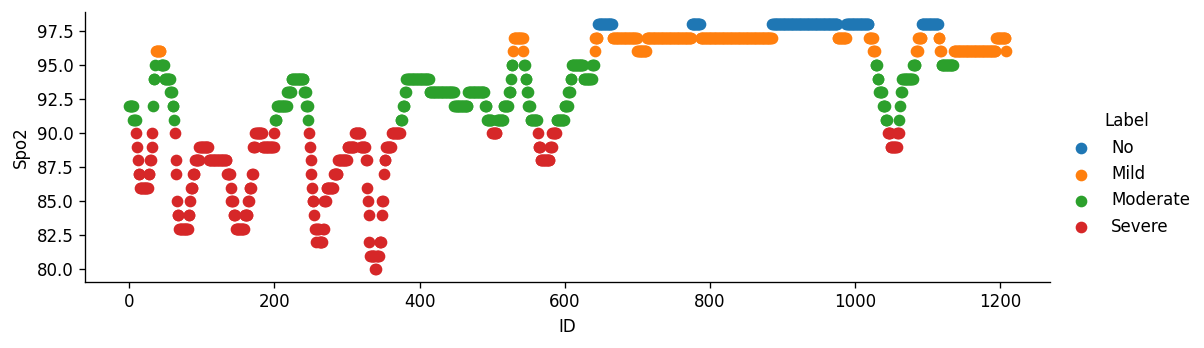

In [110]:
import seaborn as sns
_Label = ['No', 'Mild', 'Moderate', 'Severe']
fg = sns.FacetGrid(data=df, hue='Label', hue_order=_Label, aspect=3)
fg.map(plt.scatter, 'ID', 'Spo2').add_legend()

In [111]:
df.drop(["Label"],  axis=1)

,ID,Spo2
0,0,92
1,1,92
2,2,92
3,3,92
4,4,92
...,...,...
1204,1204,97
1205,1205,97
1206,1206,97
1207,1207,97


In [112]:
col = df['ID']
type(col[0])

numpy.int64

In [113]:
s = pd.Series(df['Spo2'])
s = s.diff()

<AxesSubplot:>

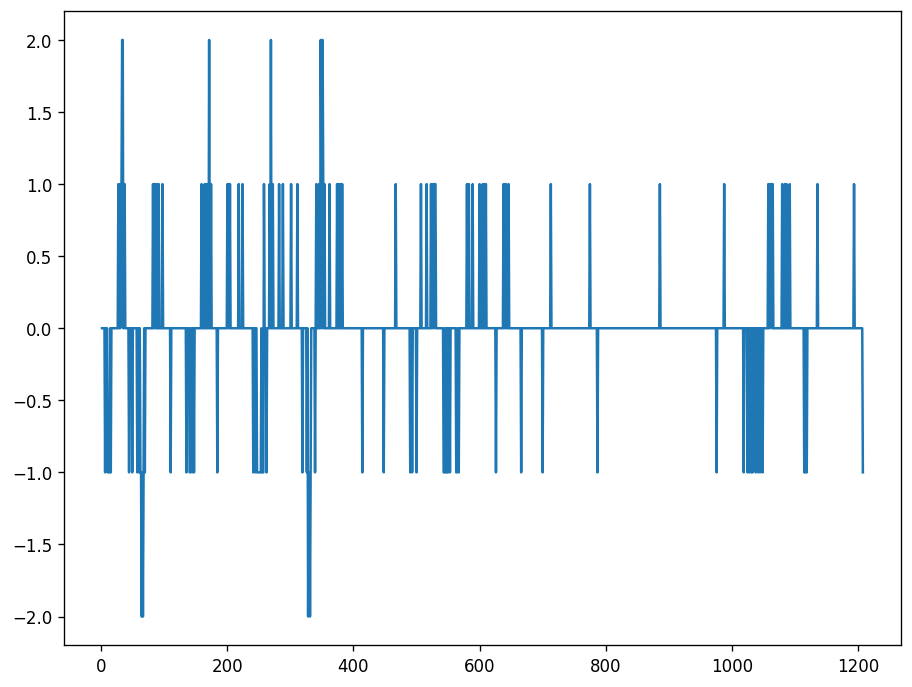

In [114]:
s.plot()
# slow deterioration = -1
# fast deterioration = -2
# slow recovery = 1
#fast recovery = 2

In [117]:
recovery = []
for i in range(len(df['Spo2'])):
    if(s[i] >= 0 and s[i] < 1):
        recovery.append("slow recovery"); 
        print("slow recovery")
    elif(s[i] > 1 and s[i] < 2):
        recovery.append("fast recovery"); 
        print("fast recovery")
    elif(s[i] >= -1 and s[i] < 0):
        recovery.append("slow deterioration"); 
        print("slow deterioration")
    else:
        recovery.append("fast deterioration"); 
        print("fast deterioration")

fast deterioration
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow deterioration
slow recovery
slow recovery
slow recovery
slow deterioration
slow deterioration
slow deterioration
slow deterioration
slow recovery
slow deterioration
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
fast deterioration
slow recovery
fast deterioration
slow recovery
fast deterioration
fast deterioration
fast deterioration
fast deterioration
slow recovery
fast deterioration
fast deterioration
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow deterioration
slow recovery
slow recovery
slow recovery
slow recovery
slow deterioration
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow recovery
slow deterioration
slow recovery
slow recovery
slow deterioration
slow recovery
slow deterioration
slow deterioration

In [118]:
df['Recovery'] = recovery
df.head()

,ID,Spo2,Label,Recovery
0,0,92,Moderate,fast deterioration
1,1,92,Moderate,slow recovery
2,2,92,Moderate,slow recovery
3,3,92,Moderate,slow recovery
4,4,92,Moderate,slow recovery


# Prediction of future values

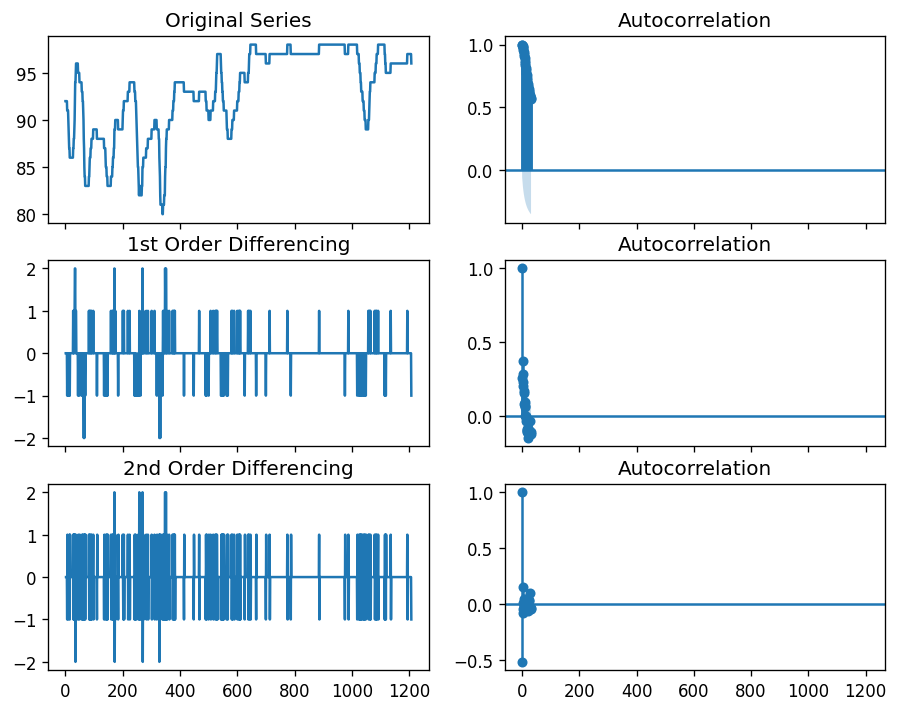

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Spo2); axes[0, 0].set_title('Original Series')
plot_acf(df.Spo2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Spo2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Spo2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Spo2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Spo2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Spo2'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94860D-01    |proj g|=  7.99211D-04

At iterate    5    f=  3.94860D-01    |proj g|=  4.67015D-05

At iterate   10    f=  3.94860D-01    |proj g|=  3.88578D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   7.772D-08   3.949D-01
  F =  0.39485955017399466     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Spo2   No. Observations:                 1208
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -476.990
Method:                       css-mle   S.D. of innovations              0.359
Date:                Sat, 10 Sep 2022   AIC                            961.981
Time:                        09:15:44   BIC                            982.368
Sample:                             1   HQIC                           969.658
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0014      0.029      0.049      0.961      -0.055       0.058
ar.L1.D.Spo2     0.8894      0.020     43.567      0.000       0.849       0.929
ma.L1.D.Spo2    -0.6880      0.029    -23.654      0.000      -0.745      -0.631
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1244           +0.0000j            1.1244            0.0000
MA.1            1.4534           +0.0000j            1.4534            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

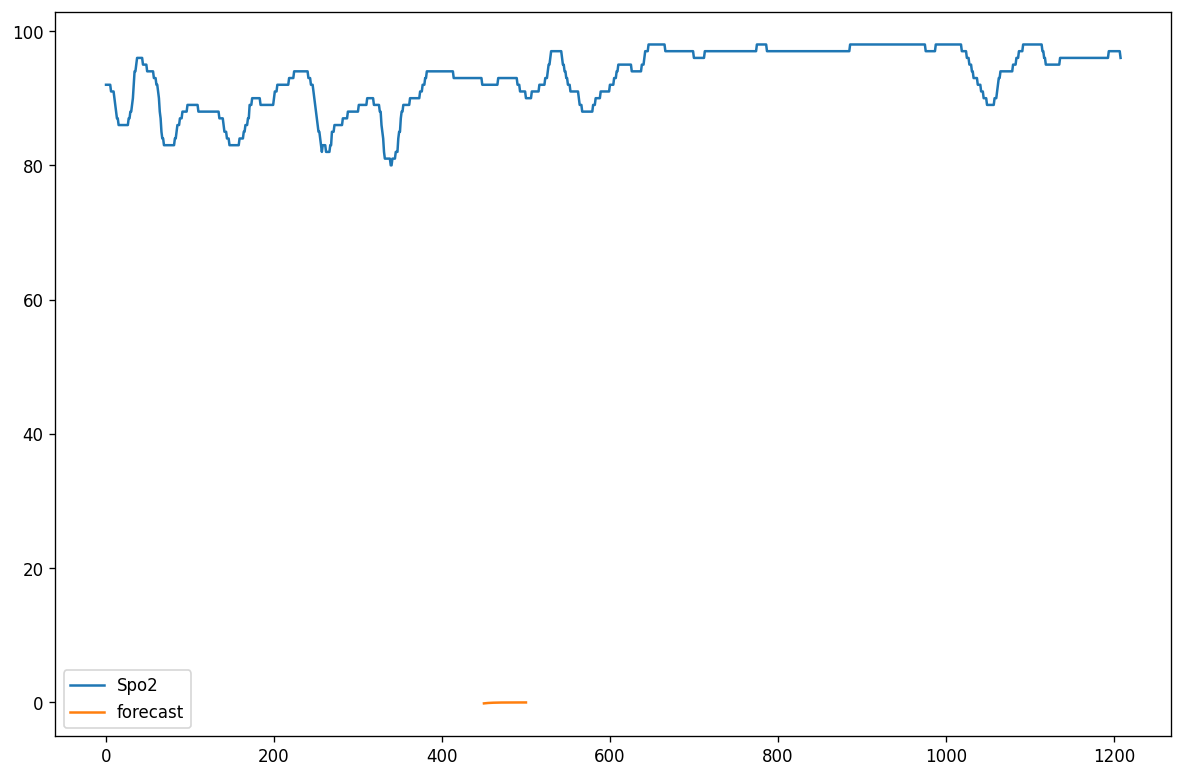

In [6]:
df['forecast']=model_fit.predict(start=450,end=500,dynamic=True)
df[['Spo2','forecast']].plot(figsize=(12,8))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24567D-01    |proj g|=  4.35373D-01

At iterate    5    f=  5.34645D-01    |proj g|=  1.36601D-01

At iterate   10    f=  4.31349D-01    |proj g|=  5.58326D-02

At iterate   15    f=  4.13608D-01    |proj g|=  1.89892D-02

At iterate   20    f=  4.13580D-01    |proj g|=  2.56810D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.603D-05   4.136D-01
  F =  0.41358014846417607     

CONVERG

<AxesSubplot:>

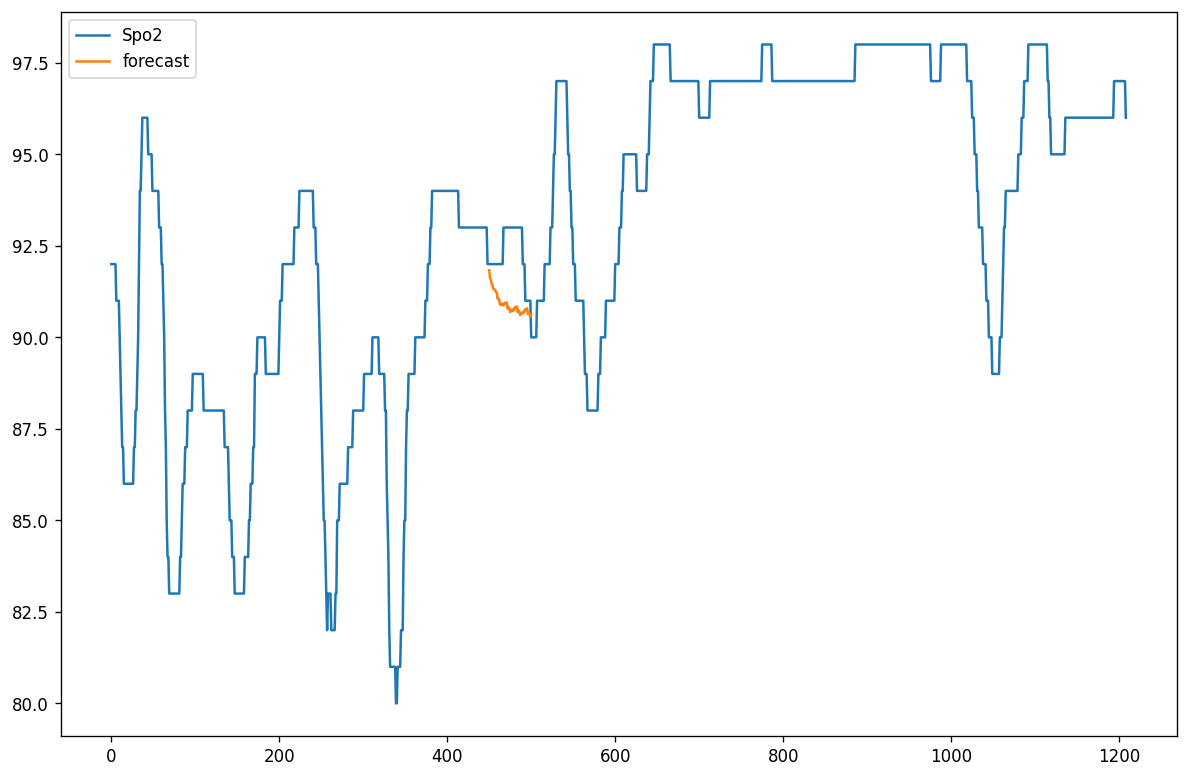

In [7]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Spo2'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=450,end=500,dynamic=True)
df[['Spo2','forecast']].plot(figsize=(12,8))

In [8]:
import datetime
from pandas.tseries.offsets import DateOffset

start = datetime.datetime.strptime("01-01-1984", "%d-%m-%Y")
date_generated = [start + DateOffset(months=x)for x in range(0,500)]
df['TimeStamp'] = date_generated

ValueError: Length of values (500) does not match length of index (1209)

In [9]:
df.set_index('TimeStamp',inplace=True)
df.head()

KeyError: "None of ['TimeStamp'] are in the columns"

In [151]:
df.tail()

,ID,Spo2,Label,forecast
TimeStamp,,,,
2025-04-01,495,86,Severe,92.592575
2025-05-01,496,100,No,91.941688
2025-06-01,497,85,Severe,93.068276
2025-07-01,498,89,Severe,91.940458
2025-08-01,499,93,Moderate,92.844059


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08980D+00    |proj g|=  7.61791D-02

At iterate    5    f=  2.92358D+00    |proj g|=  4.37824D-02

At iterate   10    f=  2.92042D+00    |proj g|=  2.07591D-02

At iterate   15    f=  2.91883D+00    |proj g|=  2.04419D-03

At iterate   20    f=  2.91873D+00    |proj g|=  9.31754D-04

At iterate   25    f=  2.91857D+00    |proj g|=  5.03013D-04

At iterate   30    f=  2.91856D+00    |proj g|=  7.98786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


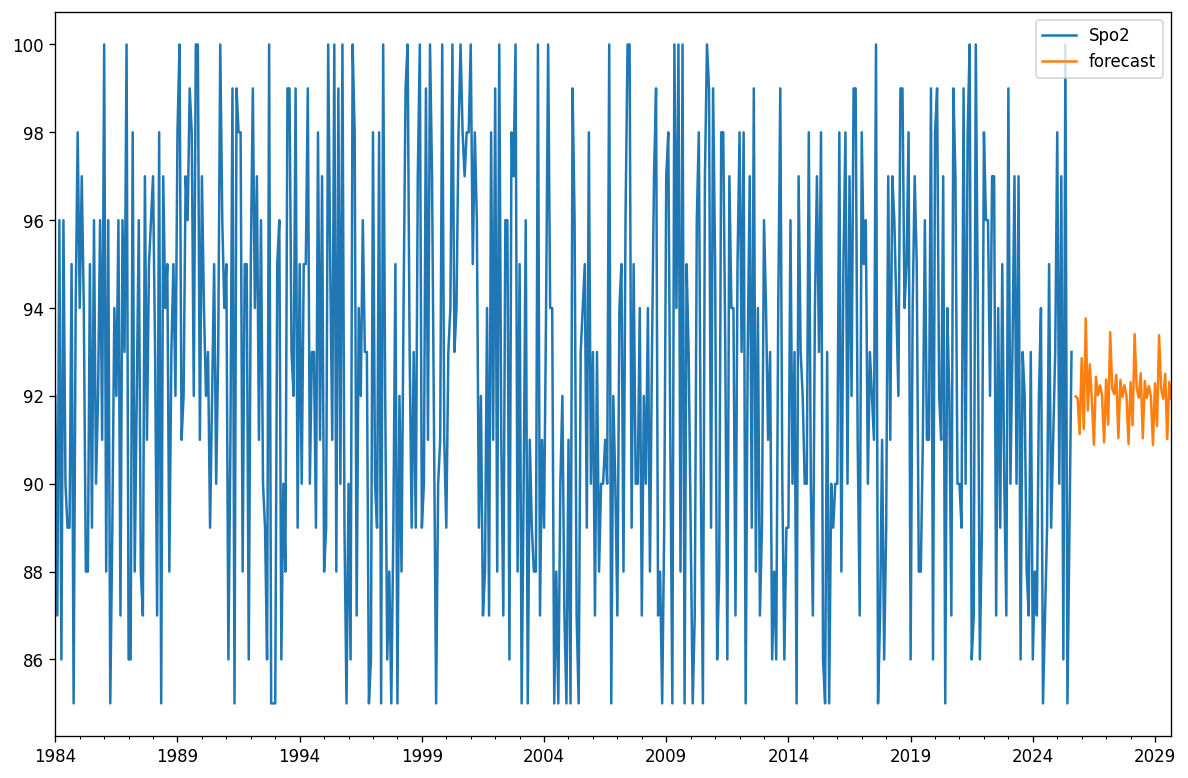

In [153]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Spo2'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
from pandas.tseries.offsets import DateOffset
print(type(df.index[-1]))
print(DateOffset(months=0))
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,50) ]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 501, end = 550, dynamic= True)
future_df[['Spo2', 'forecast']].plot(figsize=(12, 8))
print(df.forecast)
print(future_df['forecast'])